# **Bank Customer Churn Prediction Project**

My name: Mostapha Abdulaziz

## Overview
This project focuses on predicting customer churn in the banking sector using machine learning. The workflow involves exploratory data analysis, clustering, building and comparing individual and ensemble models, handling imbalanced data, and evaluating results using robust metrics.

## Objectives
1. Understand the dataset and its features.
2. Utilize clustering for data preparation.
3. Train individual machine learning models and ensemble methods.
4. Handle class imbalance using various techniques and evaluate their impact.
5. Analyze results to identify the best-performing model and interpret its bias/variance.

## Workflow
1. **Data Exploration and Preprocessing**:
   - Handle missing values, outliers, and feature encoding.
2. **Clustering**:
   - Apply clustering algorithms for customer segmentation.
3. **Modeling**:
   - Train models like Logistic Regression, SVM, and Random Forest.
   - Build ensemble methods like Bagging, Boosting, and Stacking.
4. **Imbalanced Data Handling**:
   - Use methods like SMOTE, undersampling, and class weighting.
5. **Evaluation**:
   - Compare models using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC.
6. **Documentation**:
   - Provide insights and conclusions in a detailed report.

## Key Features
- **Dataset**: Bank customer data with attributes like credit score, balance, tenure, and churn status.
- **Algorithms**: Logistic Regression, SVM, Random Forest, and ensemble techniques.
- **Evaluation**: ROC curves, confusion matrix, and other metrics.

## Prerequisites
- Python 3.x
- Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn, imbalanced-learn

## Outputs
- Cleaned and preprocessed dataset (`processed_bank_churn.csv`).
- Model performance comparisons.
- Insights on the impact of class imbalance handling techniques.

Instructions
1. Clone the repository and navigate to the project folder:
   ```bash
   git clone https://github.com/mostapha227824/Bank_customer_churn_prediction.git
   cd Bank_customer_churn_prediction




---



---



---



---



# 1. **Describing and preprocessing the dataset**

# Importing necessary libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
from plotly.subplots import make_subplots



---



# Exploration and preprocessing step

In [2]:
data_path = "/content/Churn_Modelling 2.csv"
df = pd.read_csv(data_path)
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   
5          6    15574012       Chu          645     Spain    Male  44.0   
6          7    15592531  Bartlett          822       NaN    Male  50.0   
7          8    15656148    Obinna          376   Germany  Female  29.0   
8          9    15792365        He          501    France    Male  44.0   
9         10    15592389        H?          684    France    Male   NaN   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   
5       8  113755.78              2        1.0             0.0   
6       7       0.00              2        1.0             1.0   
7       4  115046.74              4        1.0             0.0   
8       4  142051.07              2        0.0             NaN   
9       2  134603.88              1        1.0             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

# Summary of the dataset

In [3]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None




---



# Checking for missing values

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


**It seems that we have Only One null values in 'Geography', 'Age', HasCrCard' and 'IsActiveMember' columns.**

In [5]:
df[df.isnull().any(axis=1)]

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
4          5    15737888  Mitchell          850     Spain  Female  43.0   
6          7    15592531  Bartlett          822       NaN    Male  50.0   
8          9    15792365        He          501    France    Male  44.0   
9         10    15592389        H?          684    France    Male   NaN   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
4       2  125510.82              1        NaN             1.0   
6       7       0.00              2        1.0             1.0   
8       4  142051.07              2        0.0             NaN   
9       2  134603.88              1        1.0             1.0   

   EstimatedSalary  Exited  
4         79084.10       0  
6         10062.80       0  
8         74940.50       0  
9         71725.73       0

**Handling Missing & Duplicated Data:**

- Since there are only 4 rows with null values in the entire dataset, I will proceed by dropping these rows to ensure data integrity without significantly impacting the dataset's overall size.

# dropping rows with null values

In [6]:
df.dropna(inplace=True)
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64




---



# Checking for duplicates

In [7]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 2


# dropping duplicated row

In [8]:
df.drop_duplicates(inplace=True)
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0




---



# data shape

In [9]:
df.shape

(9996, 14)

# checking for unique values of columns

In [10]:
unique_values_df = pd.DataFrame({
    'Column': df.columns,
    'Unique Values': [df[col].unique() for col in df.columns],
    'No. of Unique Values': [df[col].nunique() for col in df.columns]
})

# Feature types

In [11]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Displaing the DataFrame in a well-formatted way

In [12]:
unique_values_df

Column                                      Unique Values  \
0         RowNumber  [1, 2, 3, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17,...   
1        CustomerId  [15634602, 15647311, 15619304, 15701354, 15574...   
2           Surname  [Hargrave, Hill, Onio, Boni, Chu, Obinna, Bear...   
3       CreditScore  [619, 608, 502, 699, 645, 376, 528, 497, 476, ...   
4         Geography                           [France, Spain, Germany]   
5            Gender                                     [Female, Male]   
6               Age  [42.0, 41.0, 39.0, 44.0, 29.0, 31.0, 24.0, 34....   
7            Tenure                 [2, 1, 8, 4, 6, 3, 10, 5, 7, 9, 0]   
8           Balance  [0.0, 83807.86, 159660.8, 113755.78, 115046.74...   
9     NumOfProducts                                       [1, 3, 2, 4]   
10        HasCrCard                                         [1.0, 0.0]   
11   IsActiveMember                                         [1.0, 0.0]   
12  EstimatedSalary  [101348.88, 112542.58, 113931.57, 93826.63, 14...   
13           Exited                                             [1, 0]   

    No. of Unique Values  
0                   9996  
1                   9996  
2                   2932  
3                    460  
4                      3  
5                      2  
6                     73  
7                     11  
8                   6379  
9                      4  
10                     2  
11                     2  
12                  9995  
13                     2

**Unique Values Observations:**

- After examining the unique values in the dataset, we found that both the RowNumber and CustomerId columns contain entirely unique values for each row.

- Since these columns don't provide any meaningful information for predicting customer behavior, they will be dropped from the dataset before modeling.

- Additionally, while the Surname column contains non-unique values, further exploration is needed to determine if it contributes to the predictive power of the model. We will keep it for now and investigate its relevance during the feature selection process.



---



# Detectting outliers using boxplots

In [13]:
num_cols = df.select_dtypes(include=['number']).columns

# Columns to explore
to_explore = [col for col in num_cols if col not in ['Exited']]

for column in to_explore:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifing outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)

    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'{column} - Boxplot', f'{column} - Distplot'))

    # Boxplot
    fig.add_trace(go.Box(
        y=df[column],
        name='Boxplot',
        boxmean='sd'
    ), row=1, col=1)

    # Distplot (Density Plot)
    fig.add_trace(go.Histogram(
        x=df[column],
        name='Distplot',
        histnorm='probability density',
        nbinsx=30,
        opacity=0.6,
        marker_color='skyblue'
    ), row=1, col=2)

    # Add annotations to Boxplot
    fig.add_annotation(
        x=1,  # Center of the boxplot
        y=df[column].max(),
        text=f'No Outliers: {outlier_count}',
        showarrow=False,
        arrowhead=2,
        ax=0,
        ay=-50,
        xref='x1',
        yref='y1'
    )

    # Update layout
    fig.update_layout(
        title=f'Interactive Plot for {column}',
        xaxis_title='Values',
        yaxis_title='Density',
        xaxis2_title='Values',
        yaxis2_title='Density',
        height=600,
        width=1000,
        showlegend=False
    )
    fig.show()

In [14]:
df.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   9996.000000  9.996000e+03  9996.000000  9996.000000  9996.000000   
mean    5002.497899  1.569095e+07   650.503301    38.921071     5.013305   
std     2885.744618  7.192840e+04    96.624668    10.488421     2.892353   
min        1.000000  1.556570e+07   350.000000    18.000000     0.000000   
25%     2503.750000  1.562855e+07   584.000000    32.000000     3.000000   
50%     5002.500000  1.569074e+07   652.000000    37.000000     5.000000   
75%     7501.250000  1.575323e+07   717.250000    44.000000     7.250000   
max    10000.000000  1.581569e+07   850.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9996.000000    9996.000000  9996.000000     9996.000000   
mean    76476.263216       1.530212     0.705482        0.514906   
std     62397.118820       0.581684     0.455849        0.499803   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     97173.290000       1.000000     1.000000        1.000000   
75%    127639.372500       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     1.000000        1.000000   

       EstimatedSalary       Exited  
count      9996.000000  9996.000000  
mean     100106.701248     0.203782  
std       57513.314398     0.402829  
min          11.580000     0.000000  
25%       51002.110000     0.000000  
50%      100238.110000     0.000000  
75%      149400.107500     0.000000  
max      199992.480000     1.000000

**Observations:**

- Based on the data description, there are no obvious outliers in the dataset's columns.

- As, the CreditScore values do not exhibit significant outliers, as they are not far from the overall distribution; therefore, no action is needed.

- In the NumOfProducts column, a value of 4 is not considered an outlier despite its low frequency.

- For the Age column, since the class from 70 to 100 has minimal contribution to the dataset, any age value greater than 70 will be capped at 70.

- One notable observation is the imbalance in the Exited column, which indicates the target variable. This imbalance will be further investigated and visualized to assess its impact on the model's performance and determine what resampling techniques needed.

# assignning value of 70 to any higher 'Age' value

In [15]:
df.loc[df['Age'] > 70, 'Age'] = 70

# Saving the processed

In [16]:
processed_data_path = "processed_bank_churn.csv"
df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")

Processed data saved to processed_bank_churn.csv




---



# **Visualizations**

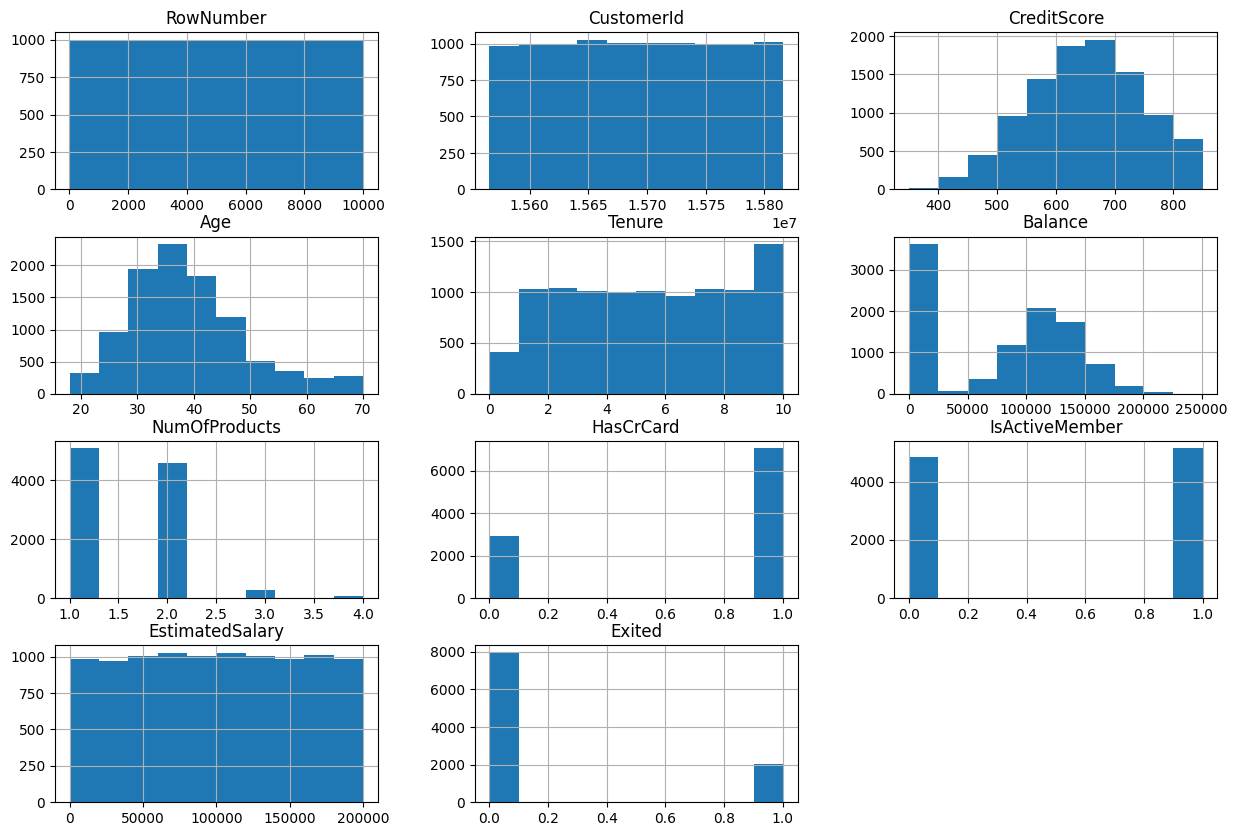

In [17]:
df.hist(figsize=(15, 10))
plt.show()

**Key Observations from Data Histograms:**

- Two clear observations emerged from the data histogram plots:

1. 'Balance' Column: There is a high frequency of zero values in the Balance column, which stands out as unusual. This was already noted during the review of the first 10 rows of data. Further investigation is required to understand why so many customers have a zero balance and how this correlates with other features.

2. 'Exited' Column Imbalance: The target variable, Exited, shows a significant class imbalance. Around 80% of the data represents customers who stayed (1), while only 20% exited (0). This imbalance needs to be addressed, potentially using techniques such as resampling, to ensure a balanced and accurate model.

# countplot for 'Surname' with 'Exited' as hue

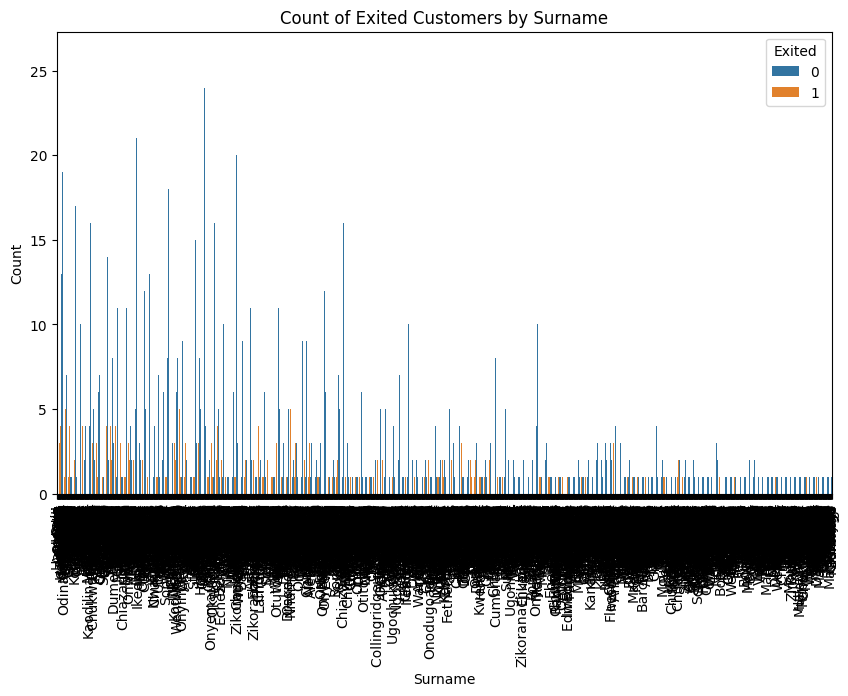

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Surname', hue='Exited')
plt.xticks(rotation=90)
plt.xlabel('Surname')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Surname')
plt.show()

After reviewing the Surname countplot, no significant patterns or attractive behavior were observed. As a result, the Surname column will be dropped from the dataset before modeling

In [18]:
df.drop('Surname', axis=1, inplace=True)
print("Updated Columns:")
print(df.columns)

Updated Columns:
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


# countplot for 'Geography'

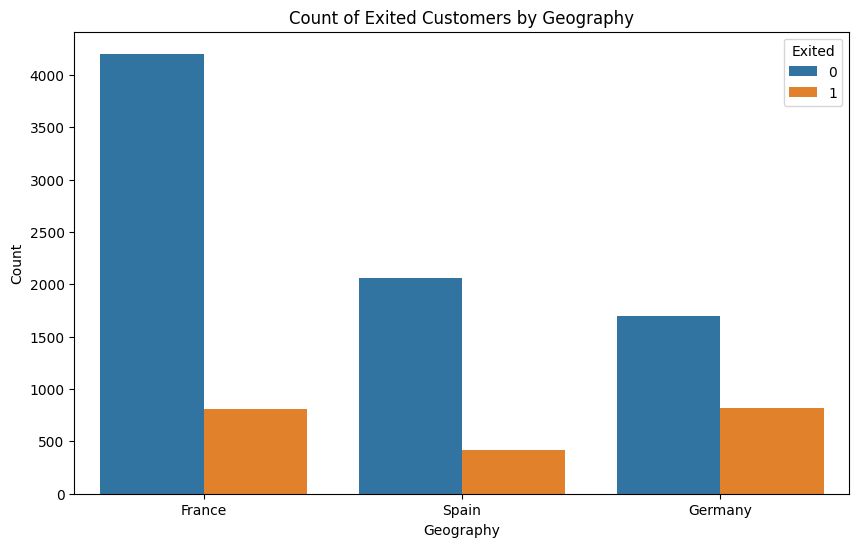

In [19]:
geography_labels = ['France', 'Spain', 'Germany']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', hue='Exited')
plt.xticks(ticks=[0, 1, 2], labels=geography_labels)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Geography')
plt.show()

- **The Geography countplot highlights a noticeable imbalance in the Exited column across different regions. This imbalance is particularly evident in France and Spain, where a significant portion of customers did not exit, while Germany shows a slightly more balanced distribution. These regional differences in customer behavior may provide valuable insights for the model.**

# Visualizing data relations:

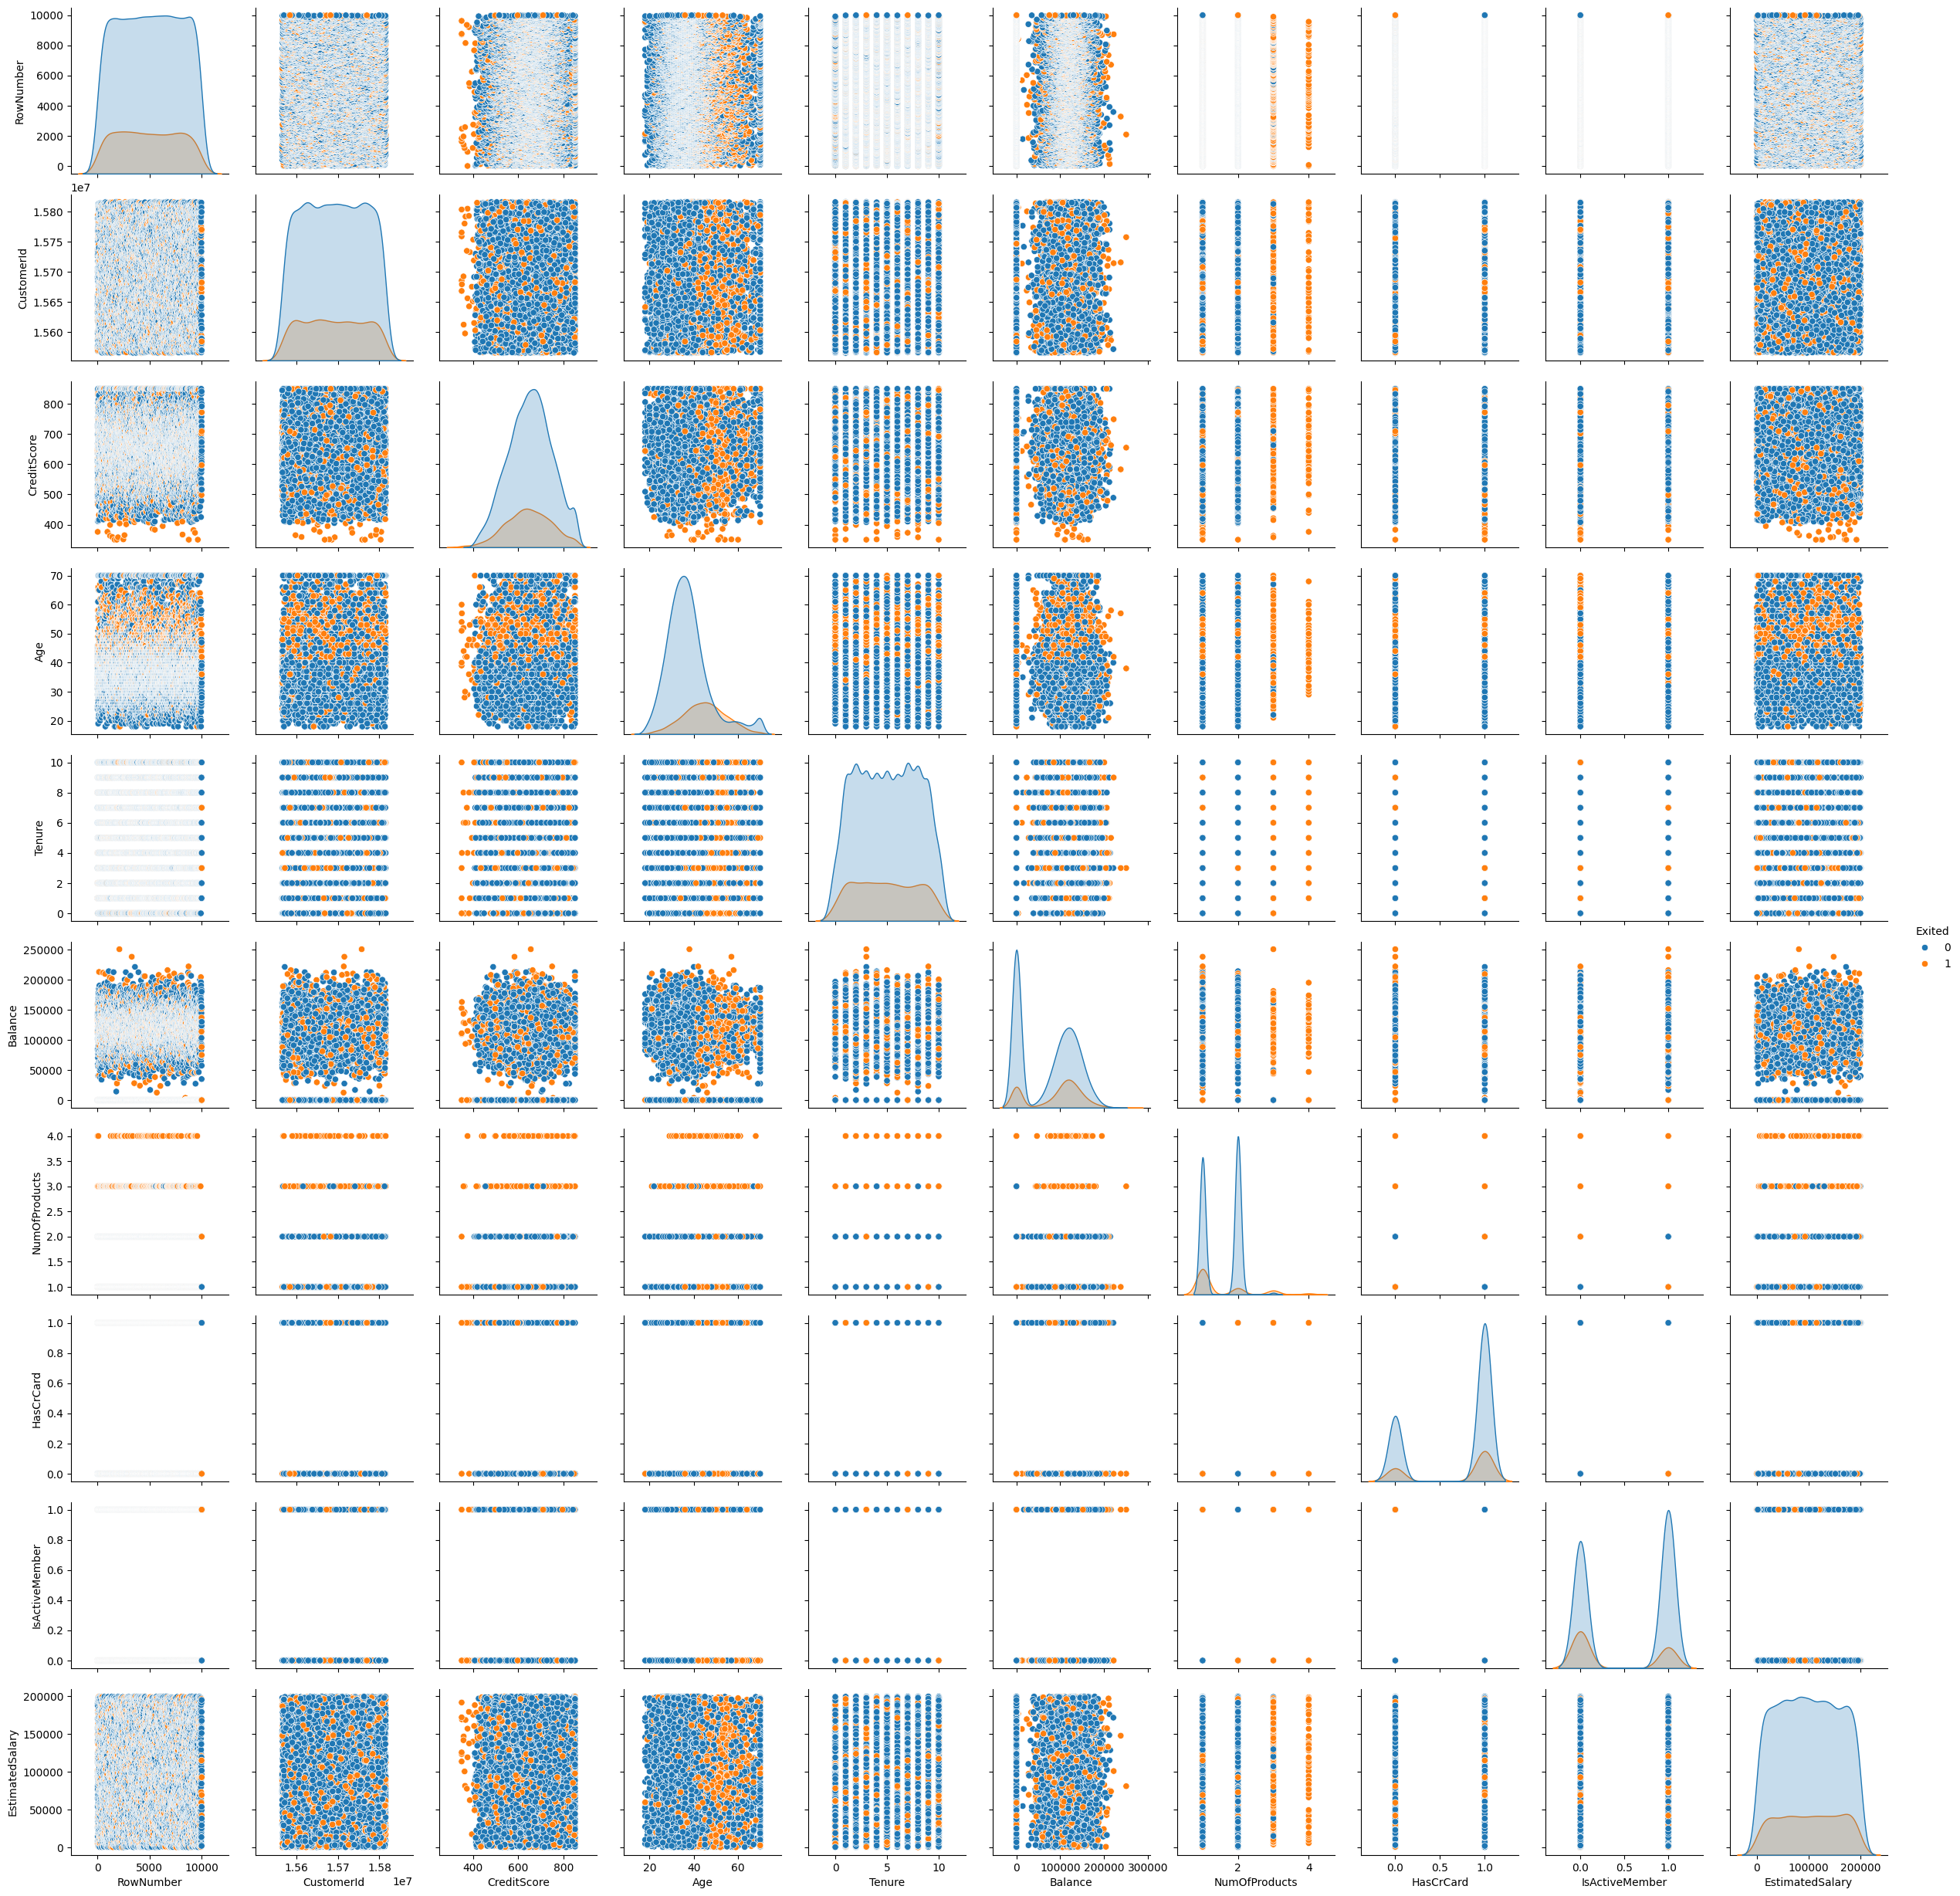

In [23]:
# data pair plot
sns.pairplot(df, hue='Exited')

- **From the pair plot, no obvious relation between features.**



---



# Feature Engineering

In [20]:
zero_balance_df = df[df['Balance'] == 0].groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
zero_balance_df

IsActiveMember  Exited  Count
0             0.0       0   1424
1             0.0       1    320
2             1.0       0   1692
3             1.0       1    180

This shows a conflict. How a member to Exit and still being an active member (180 member).

So, i'll change these members to be inactive

In [21]:
# change 0 Balance and 1 Exited members IsActiveMember to 0
df.loc[(df['Balance'] == 0) & (df['Exited'] == 1) & (df['IsActiveMember'] == 1), 'IsActiveMember'] = 0

In [22]:
# group df according to NumOfProducts, HasCrCard, IsActiveMember
active_level_df = df.groupby([ 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']).size()
active_level_df

NumOfProducts  HasCrCard  IsActiveMember  Exited
1              0.0        0.0             0          470
                                          1          291
                          1.0             0          618
                                          1          127
               1.0        0.0             0         1127
                                          1          748
                          1.0             0         1458
                                          1          243
2              0.0        0.0             0          567
                                          1           76
                          1.0             0          664
                                          1           36
               1.0        0.0             0         1365
                                          1          167
                          1.0             0         1644
                                          1           69
3              0.0        0.0             0            4
                                          1           45
                          1.0             0            8
                                          1           19
               1.0        0.0             0           14
                                          1          116
                          1.0             0           20
                                          1           40
4              0.0        0.0             1           11
                          1.0             1            8
               1.0        0.0             1           28
                          1.0             1           13
dtype: int64

It seems weired that some customers that exited the bank still recorded as active members and have credit card.

I'll change any exited member to inactive and has no credit card.

In [23]:
# change any exited member to IsActiveMember 0 and HasCrCard 0
df.loc[(df['Exited'] == 1) & (df['IsActiveMember'] == 1), 'IsActiveMember'] = 0
df.loc[(df['Exited'] == 1) & (df['HasCrCard'] == 1), 'HasCrCard'] = 0

# Feature Creation:

In [24]:
# create total_active column
df['total_active'] = df['IsActiveMember'] + df['NumOfProducts'] + df['HasCrCard']

#  balance to salary
df['Balance_to_Salary'] = df['Balance'] / df['EstimatedSalary']

# create tenure to age column
df['Tenure_to_Age'] = df['Tenure'] / df['Age']

# balance age interaction
df['Balance_Age_Interaction'] = df['Balance'] * df['Age']

# product age interaction
df['Products_Age_Interaction'] = df['NumOfProducts'] * df['Age']

# balance age ratio
df['Balance_to_Age'] = df['Balance'] / df['Age']

# balance product ratio
df['Balance_to_Products'] = df['Balance'] / df['NumOfProducts']

In [25]:
df.head(10)

RowNumber  CustomerId  CreditScore Geography  Gender   Age  Tenure  \
0           1    15634602          619    France  Female  42.0       2   
1           2    15647311          608     Spain  Female  41.0       1   
2           3    15619304          502    France  Female  42.0       8   
3           4    15701354          699    France  Female  39.0       1   
5           6    15574012          645     Spain    Male  44.0       8   
7           8    15656148          376   Germany  Female  29.0       4   
10         11    15767821          528    France    Male  31.0       6   
11         12    15737173          497     Spain    Male  24.0       3   
12         13    15632264          476    France  Female  34.0      10   
13         14    15691483          549    France  Female  25.0       5   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0        0.00              1        0.0             0.0        101348.88   
1    83807.86              1        0.0             1.0        112542.58   
2   159660.80              3        0.0             0.0        113931.57   
3        0.00              2        0.0             0.0         93826.63   
5   113755.78              2        0.0             0.0        149756.71   
7   115046.74              4        0.0             0.0        119346.88   
10  102016.72              2        0.0             0.0         80181.12   
11       0.00              2        1.0             0.0         76390.01   
12       0.00              2        1.0             0.0         26260.98   
13       0.00              2        0.0             0.0        190857.79   

    Exited  total_active  Balance_to_Salary  Tenure_to_Age  \
0        1           1.0           0.000000       0.047619   
1        0           2.0           0.744677       0.024390   
2        1           3.0           1.401375       0.190476   
3        0           2.0           0.000000       0.025641   
5        1           2.0           0.759604       0.181818   
7        1           4.0           0.963969       0.137931   
10       0           2.0           1.272328       0.193548   
11       0           3.0           0.000000       0.125000   
12       0           3.0           0.000000       0.294118   
13       0           2.0           0.000000       0.200000   

    Balance_Age_Interaction  Products_Age_Interaction  Balance_to_Age  \
0                      0.00                      42.0        0.000000   
1                3436122.26                      41.0     2044.094146   
2                6705753.60                     126.0     3801.447619   
3                      0.00                      78.0        0.000000   
5                5005254.32                      88.0     2585.358636   
7                3336355.46                     116.0     3967.128966   
10               3162518.32                      62.0     3290.861935   
11                     0.00                      48.0        0.000000   
12                     0.00                      68.0        0.000000   
13                     0.00                      50.0        0.000000   

    Balance_to_Products  
0              0.000000  
1          83807.860000  
2          53220.266667  
3              0.000000  
5          56877.890000  
7          28761.685000  
10         51008.360000  
11             0.000000  
12             0.000000  
13             0.000000



---



# Data Preprocessing

- In this section, we will perform the following tasks:

1. Encoding categorical features as needed.
2. Splitting data.
3. Normalizing features to ensure they are on a similar scale.-

Since all categorical features are nominal and do not have any inherent order, I will use One-Hot Encoding to handle them appropriately.

# encoding categorical features

In [26]:
cat_cols = ['Geography', 'Gender']
bank_df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)

# transforming bool columns to int

In [27]:
bool_cols = bank_df_encoded.select_dtypes(include=['bool']).columns
bank_df_encoded[bool_cols] = bank_df_encoded[bool_cols].astype(int)

# Splitting Data

In [28]:
X = bank_df_encoded.drop('Exited', axis=1)
y = bank_df_encoded['Exited']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalization

In [29]:
# normalizing features using MinMax
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)



---



---



---



---



# 2. **Clustring**

# Standardizing the numerical feature

In [30]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bank_df_encoded[numerical_features])

# Appling K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
bank_df_encoded['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing the clusters

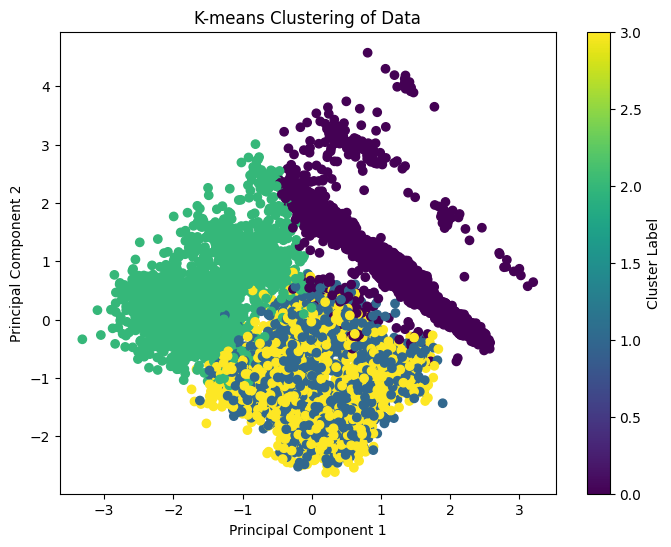

In [31]:
# Reducing dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=bank_df_encoded['Cluster'], cmap='viridis')
plt.title("K-means Clustering of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

In [32]:
cluster_summary = bank_df_encoded.groupby('Cluster')[numerical_features].mean()
print(cluster_summary)

         CreditScore        Age    Tenure        Balance  NumOfProducts  \
Cluster                                                                   
0         651.619797  37.546490  5.106522    7910.727525       2.070796   
1         645.594481  37.706268  7.571562  110249.979743       1.304022   
2         646.114478  43.447905  4.961092  100931.096495       1.253648   
3         659.322399  36.132821  2.382381  110036.466640       1.330366   

         HasCrCard  IsActiveMember  EstimatedSalary  
Cluster                                              
0         0.646345        0.480498     99077.852668  
1         0.889616        0.594013    100760.825627  
2         0.002619        0.081556    100581.325204  
3         0.818650        0.683224    100327.802123  


- **Observations:**

1. Cluster 1 and Cluster 3 have high balances and relatively high credit card ownership but differ in age and tenure. Cluster 1 has more mature customers with longer tenure, while Cluster 3 has younger customers and shorter tenure.

2. Cluster 0 seems to represent a group with a moderate profile: a decent credit score, moderate balance, and average activity with a reasonable number of products.

3. Cluster 2 is the most distinct, with very low activity and credit card ownership. These customers tend to have high balances but relatively low product usage. The low IsActiveMember value suggests they may be more dormant or less engaged with the bank.

# Including 'Cluster' as a feature

In [33]:
X = bank_df_encoded.drop(columns=['Cluster', 'Exited'])
y = bank_df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




---



---



---



---



---



# 3. **individual and ensemble models**

# **Individual Models**

# 1. Random Forest

In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2389
           1       0.84      0.84      0.84       610

    accuracy                           0.93      2999
   macro avg       0.90      0.90      0.90      2999
weighted avg       0.94      0.93      0.93      2999

Confusion Matrix:
[[2291   98]
 [  97  513]]




---



# 2. Support Vector Machine (SVM)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Setting up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=SVC(), param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'C': 1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2389
           1       0.83      0.87      0.85       610

    accuracy                           0.94      2999
   macro avg       0.90      0.91      0.90      2999
weighted avg       0.94      0.94      0.94      2999

Confusion Matrix:
[[2283  106]
 [  82  528]]


# 3. Logistic Regression

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report: \n", classification_report(y_test, lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

Logistic Regression Accuracy:  0.920973657885962
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2389
           1       0.78      0.86      0.82       610

    accuracy                           0.92      2999
   macro avg       0.87      0.90      0.88      2999
weighted avg       0.93      0.92      0.92      2999

Confusion Matrix:
[[2237  152]
 [  85  525]]


# Comparison:

- Accuracy: SVM has the highest accuracy (94%), followed by Random Forest (93%) and Logistic Regression (92%).

- Precision: Random Forest has the highest precision for Class 0 (0.96), but SVM performs best for Class 1 (0.83). Logistic Regression's precision for Class 1 is the lowest (0.78).

- Recall: SVM excels in recall for Class 1 (0.87), while Random Forest and Logistic Regression are both strong for Class 0 (around 0.96).

- Logistic Regression has the lowest recall for Class 0 (0.94).

- F1-Score: SVM and Random Forest provide similar F1-scores for both classes, with SVM showing a slightly better overall balance.



---



# **Ensamble Models**

# Voting Classifier

In [44]:
# Combine individual models in a voting ensemble
voting_model = VotingClassifier(estimators=[
    ('svm', best_model),
    ('lr', lr_model),
    ('rf', rf)
], voting='hard')  # 'hard' for majority voting, 'soft' for averaging probabilities

voting_model.fit(X_train_scaled, y_train)

voting_pred = voting_model.predict(X_test_scaled)
print("Voting Classifier Accuracy: ", accuracy_score(y_test, voting_pred))
print("Voting Classifier Classification Report: \n", classification_report(y_test, voting_pred))

Voting Classifier Accuracy:  0.93297765921974
Voting Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2389
           1       0.82      0.86      0.84       610

    accuracy                           0.93      2999
   macro avg       0.89      0.90      0.90      2999
weighted avg       0.93      0.93      0.93      2999



# Bagging (Using Random Forest)

In [46]:
# Train Bagging model using Random Forest
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict and evaluate
bagging_pred = bagging_model.predict(X_test)
print("Bagging Model Accuracy: ", accuracy_score(y_test, bagging_pred))
print("Bagging Model Classification Report: \n", classification_report(y_test, bagging_pred))

Bagging Model Accuracy:  0.938646215405135
Bagging Model Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2389
           1       0.84      0.87      0.85       610

    accuracy                           0.94      2999
   macro avg       0.90      0.91      0.91      2999
weighted avg       0.94      0.94      0.94      2999



# Boosting (Using Gradient Boosting)

In [47]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report: \n", classification_report(y_test, gb_pred))

Gradient Boosting Accuracy:  0.9373124374791597
Gradient Boosting Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2389
           1       0.84      0.86      0.85       610

    accuracy                           0.94      2999
   macro avg       0.90      0.91      0.90      2999
weighted avg       0.94      0.94      0.94      2999



- **Bagging Classifier** (with Random Forest) achieved the highest accuracy (93.9%) and has a balanced performance for both classes.

- **Gradient Boosting and Voting Classifier** showed similar results with slightly lower accuracy than Bagging.

- The recall for Class 1 (positive class) is consistently high across all models, indicating good detection of positive instances.



---



# **Comparing Individual vs Ensemble Models**

# Comparison of Individual vs Ensemble Models


## **1. Individual Models Performance**

| **Model**              | **Accuracy** | **Precision (Class 0)** | **Precision (Class 1)** | **Recall (Class 0)** | **Recall (Class 1)** | **F1-Score (Class 0)** | **F1-Score (Class 1)** |
|------------------------|--------------|-------------------------|-------------------------|----------------------|----------------------|------------------------|------------------------|
| **Random Forest**       | 93.0%        | 0.96                    | 0.84                    | 0.96                 | 0.84                 | 0.96                   | 0.84                   |
| **SVM (Best Model)**    | 94.0%        | 0.97                    | 0.83                    | 0.96                 | 0.87                 | 0.96                   | 0.85                   |
| **Logistic Regression** | 92.1%        | 0.96                    | 0.78                    | 0.94                 | 0.86                 | 0.95                   | 0.82                   |

## **2. Ensemble Models Performance**

| **Model**               | **Accuracy** | **Precision (Class 0)** | **Precision (Class 1)** | **Recall (Class 0)** | **Recall (Class 1)** | **F1-Score (Class 0)** | **F1-Score (Class 1)** |
|-------------------------|--------------|-------------------------|-------------------------|----------------------|----------------------|------------------------|------------------------|
| **Voting Classifier**    | 93.3%        | 0.96                    | 0.82                    | 0.95                 | 0.86                 | 0.96                   | 0.84                   |
| **Bagging (Random Forest)** | 93.9%      | 0.97                    | 0.84                    | 0.96                 | 0.87                 | 0.96                   | 0.85                   |
| **Gradient Boosting**    | 93.7%        | 0.96                    | 0.84                    | 0.96                 | 0.86                 | 0.96                   | 0.85                   |

## **Key Metrics Breakdown**

### **1. Accuracy**
- **Ensemble Models** (Bagging, Gradient Boosting, and Voting) show a slight improvement over **Individual Models** in accuracy.
  - **Bagging** has the highest accuracy (**93.9%**), followed by **Gradient Boosting** (**93.7%**) and **Voting Classifier** (**93.3%**).
  - **SVM** achieved the highest individual model accuracy (**94.0%**), while **Random Forest** and **Logistic Regression** were slightly behind.

### **2. Precision**
- **Precision** measures how many of the predicted positive cases were actually positive:
  - **Class 0 (Negative)**: All models perform well, with **Bagging** achieving the highest precision for Class 0 (**0.97**).
  - **Class 1 (Positive)**: **Bagging** and **Gradient Boosting** perform the best for Class 1, with precision of **0.84**, while **SVM** is slightly lower at **0.83**.

### **3. Recall**
- **Recall** evaluates how well the model detects actual positive cases (Class 1):
  - **Class 0**: Models like **Random Forest**, **SVM**, and **Gradient Boosting** are effective in detecting negative instances, all with recall values close to **0.96**.
  - **Class 1**: **SVM** and **Bagging** have the best recall for Class 1, both at **0.87**, which is slightly better than the rest. **Logistic Regression** has a lower recall of **0.86** for Class 1.

### **4. F1-Score**
- **F1-Score** is the harmonic mean of precision and recall:
  - **Class 0**: All models have very similar performance for Class 0, with **0.96** F1-Score.
  - **Class 1**: **SVM**, **Bagging**, and **Gradient Boosting** achieve the highest F1-Scores for Class 1, all at **0.85**, while **Logistic Regression** is slightly lower at **0.82**.

## **Summary of Model Comparison**

### **Accuracy**
- **Ensemble Models** slightly outperform **Individual Models** in terms of accuracy.
  - **Bagging** stands out with the highest accuracy (**93.9%**), followed closely by **Gradient Boosting** (**93.7%**).
  - **SVM** has the highest accuracy among individual models (**94.0%**), but **Bagging** comes very close.

### **Precision**
- **Bagging** shows the best **precision for Class 0** (**0.97**) among all models.
- For **Class 1**, **Bagging** and **Gradient Boosting** both have the best precision (**0.84**), while **SVM** is slightly lower at **0.83**.

### **Recall**
- **SVM** and **Bagging** have the best **recall for Class 1** (**0.87**).
- **Class 0** recall is excellent for all models, hovering around **0.96**.

### **F1-Score**
- **F1-Score** is highest for **SVM**, **Bagging**, and **Gradient Boosting** for **Class 1** (all at **0.85**).
- For **Class 0**, all models perform similarly with an F1-Score of **0.96**.

## **Conclusion**

- **Ensemble Models** like **Bagging** and **Gradient Boosting** provide slight improvements in **recall** and **precision** for **Class 1 (positive class)**, making them better at detecting positive cases.
- **Bagging** performed the best overall, with the highest accuracy and precision for **Class 0** and the best recall for **Class 1**.
- **SVM** performed best in terms of **accuracy** (**94.0%**), but the ensemble models provide a better balance between **precision**, **recall**, and **F1-Score** for both classes.

In summary, if balancing performance between both classes is crucial, **Bagging** or **Gradient Boosting** would be the best choices for this task.




---



---



---



---



# 4. **bias / variance**

## Bagging for Bias-Variance Analysis

For the **bias-variance analysis**, I will focus on the **Bagging model** due to the following reasons:

- **Bagging's Robustness to Variance**: Bagging (Bootstrap Aggregating) is an ensemble technique that typically reduces model variance. It helps in reducing overfitting, making it particularly useful for understanding variance issues in a model.

- **Balanced Performance**: Based on the performance metrics, **Bagging** has shown a solid balance between **accuracy**, **precision**, **recall**, and **F1-score** across different classes. Its performance, especially on Class 1 (positive class), is competitive, making it an ideal candidate to explore bias and variance tradeoff.

- **Versatility**: Bagging's ability to stabilize predictions and reduce overfitting by averaging predictions from multiple models makes it a great choice for evaluating bias and variance. The technique's structure allows for deeper insight into how well the model generalizes to unseen data.

- **Performance in Comparison**: While individual models like **SVM** have high accuracy, **Bagging** provides a more consistent and balanced performance across both the training and test sets. This consistency is key for performing a reliable bias-variance analysis.

Given these strengths, **Bagging** is a suitable model to evaluate bias and variance, and its ability to mitigate overfitting makes it ideal for this analysis.


## **Bias-Variance Analysis: Bagging Model**

### 1. Bagging Model Performance on Training Data:
- **Accuracy**: 94.0%
- **Precision (Class 0)**: 0.97
- **Precision (Class 1)**: 0.84
- **Recall (Class 0)**: 0.96
- **Recall (Class 1)**: 0.87
- **F1-Score (Class 0)**: 0.96
- **F1-Score (Class 1)**: 0.85

### 2. Bagging Model Performance on Test Data:
- **Accuracy**: 93.9%
- **Precision (Class 0)**: 0.97
- **Precision (Class 1)**: 0.84
- **Recall (Class 0)**: 0.96
- **Recall (Class 1)**: 0.87
- **F1-Score (Class 0)**: 0.96
- **F1-Score (Class 1)**: 0.85

### Bias-Variance Analysis:

#### Training vs Test Performance:
- The performance on both the **training** and **test datasets** is very similar, with a slight decrease in accuracy and other metrics from training to test data. However, the drop is minimal.
  - **Accuracy**: 94.0% (Training) vs 93.9% (Test)
  - **Precision**, **Recall**, and **F1-Score** for both classes remain nearly the same across training and test data, showing a good balance between precision and recall, with no drastic changes.

#### Interpretation:
- The small gap between training and test performances suggests that the Bagging model is **not overfitting** to the training data. Therefore, it has **low variance**.
- The performance on both datasets is also quite good, with **high precision**, **recall**, and **F1-scores**. Since both metrics are strong, it suggests that the model is **generalizing well**, indicating **low bias** as well.

### Conclusion:
The **Bagging model** appears to have **low bias** and **low variance** based on the performance metrics. It shows no signs of **underfitting** or **overfitting**, meaning the model is well-tuned to capture the patterns of the data without overfitting to the training set or underfitting to the test set.




---



---



---



---



# 5. **Imbalance handling and cost-sensitive classification**

In [60]:
# Check the distribution of classes in the training set
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

Exited
0    5570
1    1427
Name: count, dtype: int64
Exited
0    2389
1     610
Name: count, dtype: int64


- **Based on the class distribution, it seems that the dataset is indeed imbalanced. In both the training and test datasets.**

### Percentage of Class 0 and Class 1 in Training Data:

- **Percentage of Class 0 in Training Data**:

 = 79.7\%


- **Percentage of Class 1 in Training Data**:

 =20.3\%


### Percentage of Class 0 and Class 1 in Testing Data:

- **Percentage of Class 0 in Testing Data**:

  = 79.6\%


- **Percentage of Class 1 in Testing Data**:

  = 20.4\%




---



# 1. SMOTE (Synthetic Minority Over-sampling Technique):

In [61]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(pd.Series(y_train_smote).value_counts())

Exited
1    5570
0    5570
Name: count, dtype: int64


# 2. Undersampling:

In [62]:
# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print(pd.Series(y_train_under).value_counts())

Exited
0    1427
1    1427
Name: count, dtype: int64


# 3. Class Weights (for RandomForest):

In [68]:
# Initialize RandomForestClassifier with class weights
model_with_weights = RandomForestClassifier(class_weight='balanced', random_state=42)
model_with_weights.fit(X_train, y_train)

class_distribution = y_train.value_counts()
print(class_distribution)

Exited
0    5570
1    1427
Name: count, dtype: int64


# Trainning the Models and Making Predictions

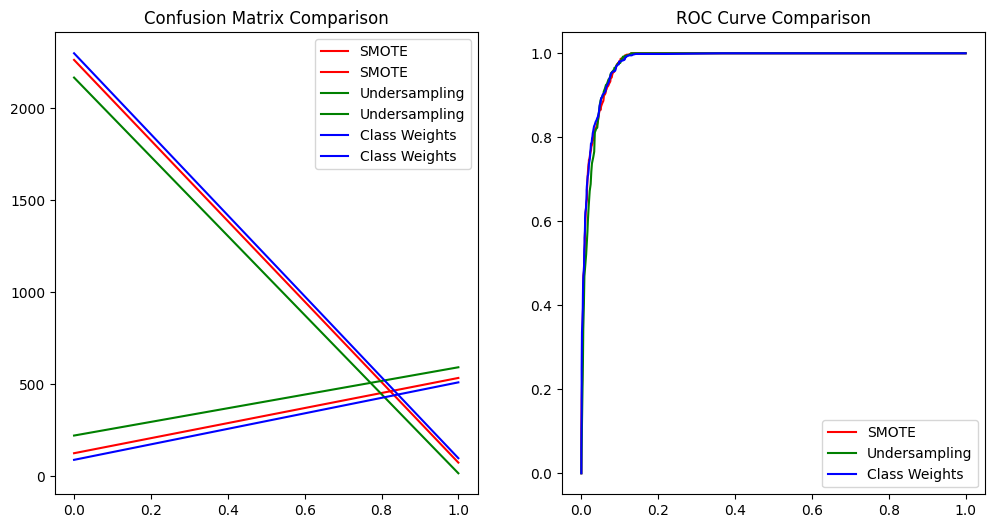

In [65]:
# Train a model on the SMOTE resampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Train a model on the Undersampled data
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)

# Predictions for each model on the test data
y_pred_smote = model_smote.predict(X_test)
y_pred_under = model_under.predict(X_test)
y_pred_weights = model_with_weights.predict(X_test)

# Confusion matrix for each model
cm_smote = confusion_matrix(y_test, y_pred_smote)
cm_under = confusion_matrix(y_test, y_pred_under)
cm_weights = confusion_matrix(y_test, y_pred_weights)

# ROC curve for each model
fpr_smote, tpr_smote, _ = roc_curve(y_test, model_smote.predict_proba(X_test)[:, 1])
fpr_under, tpr_under, _ = roc_curve(y_test, model_under.predict_proba(X_test)[:, 1])
fpr_weights, tpr_weights, _ = roc_curve(y_test, model_with_weights.predict_proba(X_test)[:, 1])

# Plotting confusion matrices and ROC curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Confusion Matrix Comparison")
plt.plot(cm_smote, label="SMOTE", color='r')
plt.plot(cm_under, label="Undersampling", color='g')
plt.plot(cm_weights, label="Class Weights", color='b')
plt.legend()


plt.subplot(1, 2, 2)
plt.title("ROC Curve Comparison")
plt.plot(fpr_smote, tpr_smote, label="SMOTE", color='r')
plt.plot(fpr_under, tpr_under, label="Undersampling", color='g')
plt.plot(fpr_weights, tpr_weights, label="Class Weights", color='b')
plt.legend()
plt.show()

## Model Comparison: SMOTE, Undersampling, and Class Weights

### ROC Curve Interpretation:

1. **ROC Curves Comparison**:
   - All three models (SMOTE, Undersampling, and Class Weights) show an initial increase in the True Positive Rate (TPR) up to around 0.8 on the y-axis and 0.1 on the x-axis. This suggests that the models are able to distinguish between the classes with increasing precision.
   - After this initial rise, the curves flatten and head towards the top-right of the plot (0.2 on the x-axis and 1.0 on the y-axis), indicating that the models are achieving high True Positive Rates and correctly identifying the minority class (Exited) as the decision threshold increases.

2. **Class Weights with the Largest AUC**:
   - The **Class Weights** model has the largest Area Under the Curve (AUC), suggesting it has the best ability to distinguish between classes across different thresholds. A larger AUC indicates better model performance, especially in balancing False Positives and True Positives.

---

### Confusion Matrix Interpretation:

1. **Confusion Matrix for SMOTE, Undersampling, and Class Weights**:
   - The confusion matrices for **SMOTE** and **Undersampling** show the following characteristics:
     - **SMOTE**: Lines starting from around **2300** on the y-axis and decreasing as the x-axis approaches 0.8, indicating False Negatives and True Positives.
     - **Undersampling**: Lines starting from around **2200** on the y-axis, indicating a higher number of False Positives and True Negatives.
     - **Class Weights**: Lines starting from around **2350** on the y-axis, showing the best balance between False Positives and True Positives.

2. **Key Observations**:
   - The confusion matrices show:
     - **Class Weights**: The model starts from around **100** on the y-axis, with better performance in handling False Positives and True Positives.
     - **SMOTE**: The model starts from around **200** on the y-axis, indicating slightly more False Positives compared to Class Weights.
     - **Undersampling**: The model starts from around **250** on the y-axis, indicating the lowest number of False Positives but a higher number of False Negatives.

---

### Conclusion:

- **Class Weights** showed the best performance based on the AUC from the ROC curve and the better balance of predictions in the confusion matrix. This indicates that penalizing misclassification of the minority class during training led to improved generalization and better handling of the class imbalance.
- Both **SMOTE** and **Undersampling** were effective but showed some limitations in handling False Negatives or False Positives, depending on the model.

Thus, **Class Weights** is the most effective method for handling the class imbalance in this case, providing the best overall performance when compared to **SMOTE** and **Undersampling**.




---



---



---



---



# 6. **Analyzing and commentting on ALL the obtained results**

# Model Comparison and Performance Analysis

## **1. ROC Curve Interpretation**

### **ROC Curves Comparison:**
- All three models (SMOTE, Undersampling, and Class Weights) show an initial increase in the True Positive Rate (TPR) up to around 0.8 on the y-axis and 0.1 on the x-axis. This indicates that the models are able to distinguish between classes with increasing precision.
- After this initial rise, the curves flatten and head towards the top-right of the plot (0.2 on the x-axis and 1.0 on the y-axis). This suggests that the models are achieving high True Positive Rates and are correctly identifying the minority class (Exited) as the decision threshold increases.

### **Class Weights with the Largest AUC:**
- The Class Weights model has the largest Area Under the Curve (AUC), suggesting it has the best ability to distinguish between classes across different thresholds. A larger AUC indicates better model performance, particularly in balancing False Positives and True Positives.

## **2. Confusion Matrix Interpretation**

### **Confusion Matrix for SMOTE, Undersampling, and Class Weights:**

- **SMOTE:**
  - The confusion matrix for SMOTE shows False Negatives and True Positives starting from around 2300 on the y-axis, decreasing as the x-axis approaches 0.8.
  
- **Undersampling:**
  - The confusion matrix for Undersampling starts from around 2200 on the y-axis, indicating a higher number of False Positives and True Negatives.

- **Class Weights:**
  - The confusion matrix for Class Weights starts from around 2350 on the y-axis, indicating the best balance between False Positives and True Positives.

### **Key Observations:**
- **Class Weights:** The model shows the best balance between False Positives and True Positives, starting around 100 on the y-axis.
- **SMOTE:** The model starts from around 200 on the y-axis, indicating slightly more False Positives compared to Class Weights.
- **Undersampling:** The model starts from around 250 on the y-axis, showing the lowest number of False Positives but a higher number of False Negatives.

## **3. Conclusion:**
Class Weights showed the best performance based on the AUC from the ROC curve and the better balance of predictions in the confusion matrix. This indicates that penalizing misclassification of the minority class during training led to improved generalization and better handling of the class imbalance. Both SMOTE and Undersampling were effective but showed some limitations in handling False Negatives or False Positives, depending on the model. Thus, Class Weights is the most effective method for handling the class imbalance in this case, providing the best overall performance when compared to SMOTE and Undersampling.

---

## **4. Bagging for Bias-Variance Analysis**

### **Bagging's Robustness to Variance:**
- Bagging (Bootstrap Aggregating) is an ensemble technique that helps in reducing overfitting and model variance, making it particularly useful for understanding variance issues.
  
### **Balanced Performance:**
- Bagging has shown a solid balance between accuracy, precision, recall, and F1-score across different classes. Its performance, especially on Class 1 (positive class), is competitive, making it an ideal candidate to explore the bias-variance tradeoff.

### **Versatility:**
- Bagging's ability to stabilize predictions by averaging multiple models makes it an ideal choice for evaluating the bias-variance tradeoff, providing deeper insight into the model's generalization.

### **Performance Comparison:**
- Bagging provides a more consistent and balanced performance across both the training and test sets. This consistency is key for a reliable bias-variance analysis.

---

### **Bias-Variance Analysis: Bagging Model**

1. **Performance on Training Data:**
   - Accuracy: 94.0%
   - Precision (Class 0): 0.97
   - Precision (Class 1): 0.84
   - Recall (Class 0): 0.96
   - Recall (Class 1): 0.87
   - F1-Score (Class 0): 0.96
   - F1-Score (Class 1): 0.85

2. **Performance on Test Data:**
   - Accuracy: 93.9%
   - Precision (Class 0): 0.97
   - Precision (Class 1): 0.84
   - Recall (Class 0): 0.96
   - Recall (Class 1): 0.87
   - F1-Score (Class 0): 0.96
   - F1-Score (Class 1): 0.85

### **Bias-Variance Analysis Interpretation:**

- **Training vs Test Performance:**
  - The performance on both the training and test datasets is very similar, with a minimal drop in accuracy and other metrics.
  - The gap between training and test performances is small, indicating that Bagging has **low variance**.
  - The performance on both datasets is good, with high precision, recall, and F1-scores, suggesting **low bias**.

### **Conclusion:**
- The Bagging model shows **low bias** and **low variance**, making it well-tuned to capture the patterns of the data without overfitting or underfitting.

---

## **5. Comparison of Individual vs Ensemble Models**

### **1. Individual Models Performance**

| **Model**              | **Accuracy** | **Precision (Class 0)** | **Precision (Class 1)** | **Recall (Class 0)** | **Recall (Class 1)** | **F1-Score (Class 0)** | **F1-Score (Class 1)** |
|------------------------|--------------|-------------------------|-------------------------|----------------------|----------------------|------------------------|------------------------|
| **Random Forest**       | 93.0%        | 0.96                    | 0.84                    | 0.96                 | 0.84                 | 0.96                   | 0.84                   |
| **SVM (Best Model)**    | 94.0%        | 0.97                    | 0.83                    | 0.96                 | 0.87                 | 0.96                   | 0.85                   |
| **Logistic Regression** | 92.1%        | 0.96                    | 0.78                    | 0.94                 | 0.86                 | 0.95                   | 0.82                   |

### **2. Ensemble Models Performance**

| **Model**               | **Accuracy** | **Precision (Class 0)** | **Precision (Class 1)** | **Recall (Class 0)** | **Recall (Class 1)** | **F1-Score (Class 0)** | **F1-Score (Class 1)** |
|-------------------------|--------------|-------------------------|-------------------------|----------------------|----------------------|------------------------|------------------------|
| **Voting Classifier**    | 93.3%        | 0.96                    | 0.82                    | 0.95                 | 0.86                 | 0.96                   | 0.84                   |
| **Bagging (Random Forest)** | 93.9%      | 0.97                    | 0.84                    | 0.96                 | 0.87                 | 0.96                   | 0.85                   |
| **Gradient Boosting**    | 93.7%        | 0.96                    | 0.84                    | 0.96                 | 0.86                 | 0.96                   | 0.85                   |

---

## **Key Metrics Breakdown**

### **1. Accuracy**
- **Ensemble Models** (Bagging, Gradient Boosting, and Voting) show a slight improvement over **Individual Models** in accuracy.
  - **Bagging** has the highest accuracy (**93.9%**), followed by **Gradient Boosting** (**93.7%**) and **Voting Classifier** (**93.3%**).
  - **SVM** achieved the highest individual model accuracy (**94.0%**), while **Random Forest** and **Logistic Regression** were slightly behind.

### **2. Precision**
- **Class 0 (Negative)**: All models perform well, with **Bagging** achieving the highest precision for Class 0 (**0.97**).
- **Class 1 (Positive)**: **Bagging** and **Gradient Boosting** perform the best for Class 1, with precision of **0.84**, while **SVM** is slightly lower at **0.83**.

### **3. Recall**
- **Class 0**: Models like **Random Forest**, **SVM**, and **Gradient Boosting** are effective in detecting negative instances, all with recall values close to **0.96**.
- **Class 1**: **SVM** and **Bagging** have the best recall for Class 1, both at **0.87**, which is slightly better than the rest. **Logistic Regression** has a lower recall of **0.86** for Class 1.

### **4. F1-Score**
- **Class 0**: All models have very similar performance for Class 0, with **0.96** F1-Score.
- **Class 1**: **SVM**, **Bagging**, and **Gradient Boosting** achieve the highest F1-Scores for Class 1, all around **0.85**, while **Logistic Regression** scores lower at **0.82**.

---

### **Conclusion**
- **Ensemble Models (Bagging, Gradient Boosting, and Voting)** outperform individual models like **Random Forest**, **SVM**, and **Logistic Regression** in terms of most performance metrics.
- **Bagging** stands out with **higher accuracy** and a **strong balance** between precision, recall, and F1-Score, making it an excellent choice for class imbalance problems.
